## Logistic Regression Algorithm

Even though logistic regression has "regression" in its name, it is used as a classification algorithm. It calculates the probability that a sample belongs to a class. Rather than fitting a line to the data, it fits an "S" shaped curve called the sigmoid function.

The formula for logistic regression is as follows:

$$y = \frac{1}{1 + e^{-z}}$$

where $y$ is the probability that a sample belongs to a class and $z$ is the linear combination of the features.

The algorithm is as follows:

- Initialize the weights.
- Calculate the predicted values.
- Calculate the error.
- Update the weights.
- Repeat the steps above until convergence.


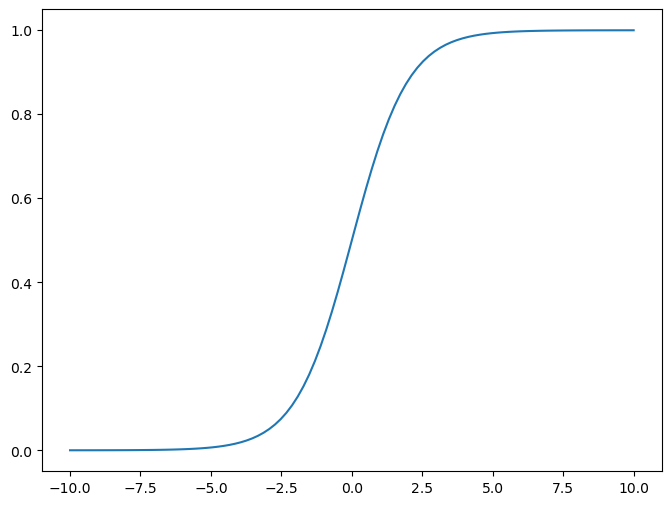

In [1]:
# plot sigmoid function
import numpy as np 
from matplotlib import pyplot as plt
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)

## Real World Example with Eye movements

From the website:

The dataset consist of several assignments. Each assignment consists of a question followed by ten sentences (titles of news articles). One of the sentences is the correct answer to the question (C) and five of the sentences are irrelevant to the question (I). Four of the sentences are relevant to the question (R), but they do not answer it.

- Features are in columns, feature vectors in rows.
- Each assignment is a time sequence of 22-dimensional feature vectors.
- The first column is the line number, second the assignment number and the next 22 columns (3 to 24) are the different features. Columns 25 to 27 contain extra information about the example. The training data set contains the classification label in the 28th column: "0" for irrelevant, "1" for relevant and "2" for the correct answer.
- Each example (row) represents a single word. You are asked to return the classification of each read sentence.
- The 22 features provided are commonly used in psychological studies on eye movement. All of them are not necessarily relevant in this context.

The objective of the Challenge is to predict the classification labels (I, R, C).


In [2]:
# https://www.openml.org/da/1044
from datasets import load_dataset
eye = load_dataset('inria-soda/tabular-benchmark', data_files='clf_num/eye_movements.csv')

eye_movements.csv: 0.00B [00:00, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
eye_df = eye['train'].to_pandas()
eye_df

,lineNo,assgNo,prevFixDur,firstfixDur,firstPassFixDur,nextFixDur,firstSaccLen,lastSaccLen,prevFixPos,landingPos,...,totalFixDur,meanFixDur,regressLen,regressDur,pupilDiamMax,pupilDiamLag,timePrtctg,titleNo,wordNo,label
0,9684.0,298.0,99.0,119.0,119.0,238.0,300.1666,288.0156,246.0732,56.6326,...,119.0,119.0000,0.0,0.0,0.1541,0.4446,0.0176,4,3,0
1,2065.0,66.0,119.0,159.0,239.0,100.0,306.1066,117.2359,321.0140,47.3207,...,239.0,119.5000,0.0,159.0,0.0119,0.3264,0.0239,8,1,0
2,1969.0,61.0,139.0,139.0,357.0,179.0,590.5294,805.0531,479.3078,112.3610,...,536.0,178.6667,258.0,0.0,0.0874,0.0859,0.0431,4,8,0
3,10326.0,315.0,199.0,139.0,219.0,99.0,80.9475,306.5587,153.1698,79.8389,...,198.0,99.0000,0.0,396.0,0.0173,0.1453,0.0264,4,2,0
4,6827.0,204.0,80.0,100.0,239.0,139.0,110.7576,161.4845,189.6207,96.7471,...,139.0,139.0000,0.0,378.0,0.3229,0.4074,0.0288,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,10923.0,336.0,219.0,219.0,219.0,119.0,277.4140,27.8568,281.0640,18.6078,...,219.0,219.0000,417.0,139.0,0.2830,0.4085,0.0187,9,4,1
7604,10924.0,336.0,219.0,119.0,278.0,139.0,27.8568,69.0290,111.3643,84.8528,...,278.0,139.0000,0.0,278.0,0.2830,0.4730,0.0237,9,3,1
7605,10925.0,336.0,219.0,219.0,219.0,119.0,69.0290,165.0273,55.7136,30.3026,...,139.0,139.0000,417.0,139.0,0.2830,0.4730,0.0119,9,4,1
7606,10926.0,336.0,139.0,179.0,179.0,80.0,165.0273,1445.4747,122.5887,38.3471,...,179.0,179.0000,0.0,0.0,0.2230,0.4730,0.0153,9,5,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = eye_df.drop(columns=['label'])
y = eye_df['label']


std = StandardScaler()

X_scaled = std.fit_transform(X)

eye_log = LogisticRegression()

eye_log.fit(X_scaled, y)
eye_log.score(X_scaled, y)

0.5638801261829653

<Axes: >

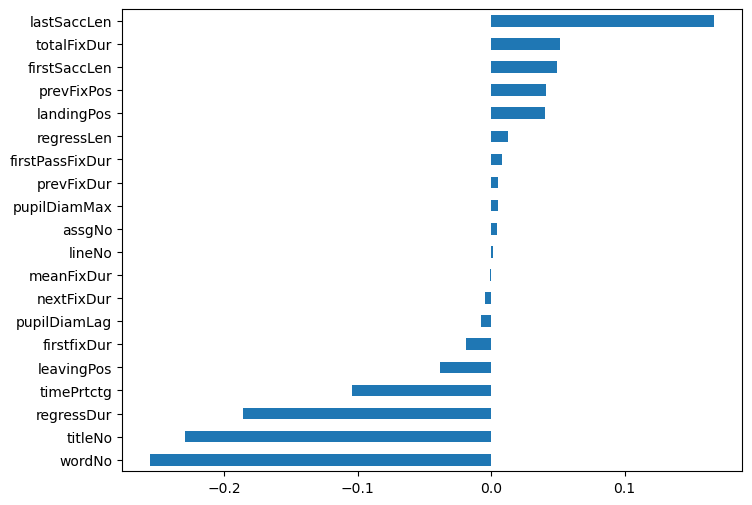

In [5]:
import pandas as pd

pd.Series(eye_log.coef_[0], index=X.columns).sort_values().plot.barh(figsize=(8, 6))